In [1]:
import numpy as np
import matplotlib.pyplot as plt
def pause():
    ## pauses until a keyboard entry (e.g. carrage return)#     
    print('\r')     
    dummy = input('Pause')     
    print('\r')

#  Part A(i)
Loads in the fits file, normalizes the data on a [0,1) range to reduce noise, and finally displays the image in greyscale.

Generating Greyscale SDSS 12 Image...


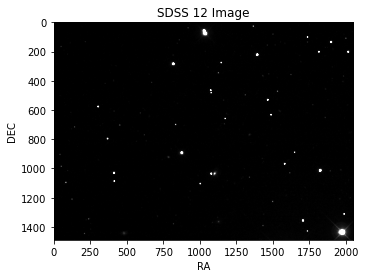

In [2]:
print('Generating Greyscale SDSS 12 Image...')
from astropy.io import fits as pyfits
hdulist =pyfits.open('frame-g-000094-1-0131.fits') 
im=hdulist[0].data
hdulist.close()
plt.xlabel('RA')
plt.ylabel('DEC')
plt.title('SDSS 12 Image')
plt.imshow(im,vmin = 0,vmax=1, cmap = 'gray')
plt.show() #vmin/vmax are used to reduce noise/outliers and get only normalized values
#could not figure out how to convert to actual RA abd DEC values...

In [3]:
pause()


Pause



# Part A(ii)
Loads in the csv data file. Finds and removes duplicates in the data. Then graphs their x and y positions on a scatter plot.

In [4]:
print('Importing csv data and outputting graph of star positions...')
fname = 'frame-g-000094-1-0131.csv'
star_all_rows = np.genfromtxt(fname,delimiter = ',',skip_header = 1)
star_all_rows = star_all_rows[star_all_rows[:, 0].argsort()] #sorts the list by x position value

Importing csv data and outputting graph of star positions...


In [5]:
dups = []
for i in range(len(star_all_rows)-1):
    if (star_all_rows[i,0] == star_all_rows[i+1,0]) and (star_all_rows[i,1] == star_all_rows[i+1,1]):
        dups.append(i) #compares the x and y values to find duplicates in the data
removed_duplicates = np.delete(star_all_rows,dups,0) #deletes the found duplicates
x_positions = removed_duplicates[:,0]
y_positions = removed_duplicates[:,1]
g_band = removed_duplicates[:,2]

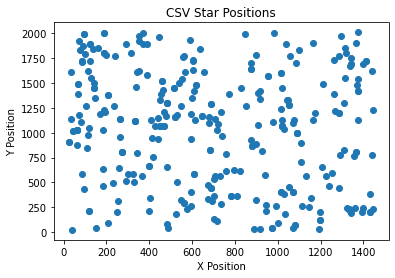

In [6]:
plt.scatter(x_positions,y_positions)
plt.title('CSV Star Positions');plt.xlabel('X Position');plt.ylabel('Y Position')
plt.show()

In [7]:
pause()


Pause



# Part A(iii)
Re-plots the csv data, but sizes the points by their g-band magnitude value.

Sizing stars by g-band values...


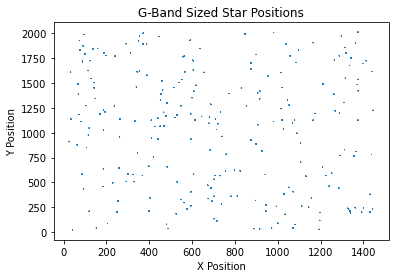

In [8]:
print('Sizing stars by g-band values...')
plt.scatter(x_positions,y_positions,s=g_band**-10) #sizes so the larger tthe g-band, the smaller the point
plt.title('G-Band Sized Star Positions');plt.xlabel('X Position');plt.ylabel('Y Position')
plt.show()

In [9]:
pause()


Pause



# Part B(i)
First finds the max and min values of the data set's positions. Then uses them to generate np.random.uniform arrays of x and y positions for a random star field plot. 

In [10]:
print('Making plot of randomly generated star positions...')
max_val_x = np.max(removed_duplicates[:,0])
max_val_y = np.max(removed_duplicates[:,1]) #finds maximums in the data
max_val_g = np.max(removed_duplicates[:,2])

min_val_x = np.min(removed_duplicates[:,0])
min_val_y = np.min(removed_duplicates[:,1]) #finds minimums in the data
min_val_g = np.min(removed_duplicates[:,2])

Making plot of randomly generated star positions...


In [11]:
#creates random position arrays with the same length as the csv files
np.random.seed(1590) #specify seed for replicability
x_random = np.random.uniform(low = min_val_x,high = max_val_x,size = len(removed_duplicates))
y_random = np.random.uniform(low = min_val_y,high = max_val_y,size = len(removed_duplicates))

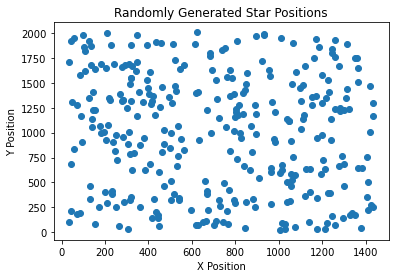

In [12]:
plt.scatter(x_random,y_random)
plt.title('Randomly Generated Star Positions');plt.xlabel('X Position');plt.ylabel('Y Position')
plt.show()

In [13]:
pause()


Pause



# Part B(ii.a)
Iterates through the position values in both the csv and the random star fields, finds the minimum distance to the nearest star, and returns a histogram of the distances.

In [14]:
print('Finding minimum distances between SDSS 12 star positions...')

Finding minimum distances between SDSS 12 star positions...


In [15]:
#takes xposition and yposition arrays as arguements, finds the distances between all points,
#then narrows down to just the minimum distances to each neighboring star
def min_dist(x_arr,y_arr):
    distances = []
    for i in range(len(x_arr)+1):
            for j in range(i + 1, len(x_arr)): #iterates through all of the stars
                length = ((x_arr[j]-x_arr[i])**2 + (y_arr[j]-y_arr[i])**2)**.5
                distances.append(length) #creates a list with all of the stars distance to each other star
    min_vals = []
    for i in range(0,len(distances),315):
        mins = min(distances[i:i+1])
        min_vals.append(mins) #finds the minimum distance to a neighbor for each star
    min_vals = np.array(min_vals)
    return min_vals #returns an array with the minimum distance values

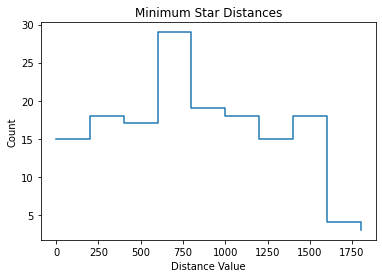

In [16]:
csv_min_vals = min_dist(x_positions,y_positions)
from scipy import integrate
nbins = 10
hmin = 0
hmax = 2000
hist_1,binv = np.histogram(csv_min_vals,bins=nbins,range=(hmin,hmax))
binv=binv[0:nbins]
plt.step(binv,hist_1,where='post')
plt.title('Minimum Star Distances');plt.xlabel('Distance Value');plt.ylabel('Count')
plt.show()

In [17]:
pause()


Pause



In [18]:
rand_min_vals = min_dist(x_random,y_random) #min distance values of the random plot data

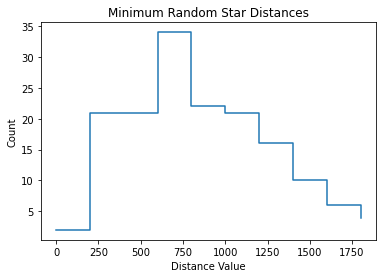

In [19]:
nbins = 10
hmin = 0
hmax = 2000
hist_2,binv = np.histogram(rand_min_vals,bins=nbins,range=(hmin,hmax))
binv=binv[0:nbins]
plt.step(binv,hist_2,where='post')
plt.title('Minimum Random Star Distances');plt.xlabel('Distance Value');plt.ylabel('Count')
plt.show()

In [20]:
pause()


Pause



# Part B(ii.b)
Finds the skewness of each histogram data set.

In [21]:
from scipy.stats import skew
print('\nMean for csv data : ',np.mean(csv_min_vals))
print('\nSkewness for csv data : ', skew(csv_min_vals))


Mean for csv data :  848.1938222824228

Skewness for csv data :  0.1926353438257467


In [22]:
print('\nMean for random created data : ',np.mean(rand_min_vals))
print('\nSkewness for random created data : ', skew(rand_min_vals))


Mean for random created data :  875.9343590775359

Skewness for random created data :  0.4163418287265594


In [23]:
pause()


Pause



# Part B(ii.c)
Finds the Chi-Squared and P-Value for the csv data set compared to the random data set.

In [24]:
import scipy.stats as stats
def mychi(data,expect):
    #compute chi**2 and p-value     
    chisq=np.sum((data-expect)**2/expect)    
    pval=1.0-stats.chi2.cdf(chisq,np.size(data)-1)    
    return chisq,pval

In [25]:
hist_1_bins=[]
for i in hist_1:
    if i >= 5: #removes bins that have less than 5 counts
        hist_1_bins.append(i)
hist_1_bins = np.array(hist_1_bins) #the observed data
   
hist_2_bins=[]
for i in hist_2:
    if i >= 5:
        hist_2_bins.append(i)
hist_2_bins = np.array(hist_2_bins) #the expected data
  
print('The Chi-Squared and P-value for the data is' , mychi(hist_1_bins,hist_2_bins))

The Chi-Squared and P-value for the data is (39.81060606060606, 1.3683266941733052e-06)
